<a href="https://colab.research.google.com/github/Jatin-G-debu/Classification_digits_MNIST_dataset/blob/master/Classification_digits_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [ ]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
0


In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N,  6, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
            nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 8, 8) -> (N, 16, 4, 4)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),         # (N, 256) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net=LeNet()

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),weight_decay=1e-5)

Epoch: 0/16, Test acc: 93.78, Train acc: 93.35
Epoch: 1/16, Test acc: 96.86, Train acc: 96.70
Epoch: 2/16, Test acc: 97.25, Train acc: 97.15
Epoch: 3/16, Test acc: 97.77, Train acc: 97.79
Epoch: 4/16, Test acc: 97.98, Train acc: 98.24
Epoch: 5/16, Test acc: 98.21, Train acc: 98.42
Epoch: 6/16, Test acc: 98.47, Train acc: 98.61
Epoch: 7/16, Test acc: 98.53, Train acc: 98.83
Epoch: 8/16, Test acc: 98.64, Train acc: 98.96
Epoch: 9/16, Test acc: 98.51, Train acc: 98.95
Epoch: 10/16, Test acc: 98.70, Train acc: 99.05
Epoch: 11/16, Test acc: 98.83, Train acc: 99.31
Epoch: 12/16, Test acc: 98.59, Train acc: 99.01
Epoch: 13/16, Test acc: 98.76, Train acc: 99.40
Epoch: 14/16, Test acc: 98.75, Train acc: 99.23
Epoch: 15/16, Test acc: 98.64, Train acc: 99.36


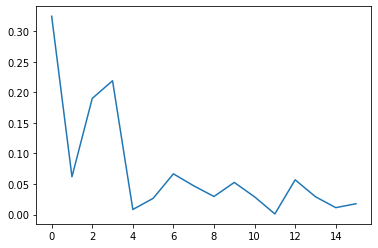

CPU times: user 7min 21s, sys: 3.41 s, total: 7min 24s
Wall time: 7min 24s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()